In [15]:
import pandas as pd
import matplotlib.pyplot as plt

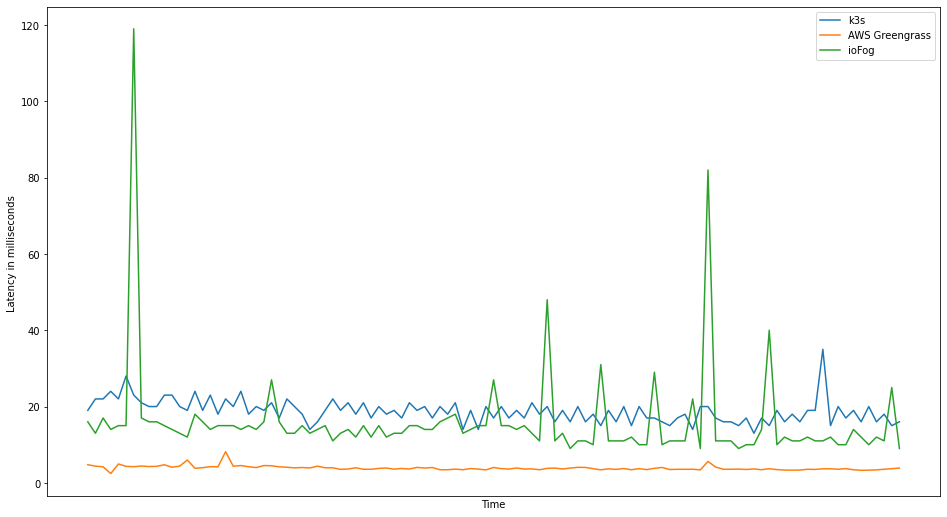

In [17]:
data = {'k3s': [], 'AWS Greengrass': [], 'ioFog': []}

with open('../../k3s/latency/latency.log') as f:
    for line in f.readlines():
        diff = float(line.split('| ')[1])
        data['k3s'].append(diff)

with open('../../aws-greengrass/latency/latency.log') as f:
    for line in f.readlines():
        v = float(line.split('] = ')[1].split('. {scriptName=')[0]) / 1000000
        data['AWS Greengrass'].append(v)

with open('../../iofog/latency/latency.log') as f:
    lines = f.readlines()
    for chunk in [lines[x:x+2] for x in range(0, len(lines), 2)]:
        start = int(chunk[0].split("Sending IOMessage - timestamp: ")[1])
        end = int(chunk[1].split("onMessageReceipt - timestamp: ")[1])
        diff = end - start
        data['ioFog'].append(diff)

min_length = min(len(data['k3s']), len(data['AWS Greengrass']), len(data['ioFog']))
adjusted_data = {'k3s': data['k3s'][:min_length], 'AWS Greengrass': data['AWS Greengrass'][:min_length], 'ioFog': data['ioFog'][:min_length]}
df = pd.DataFrame(adjusted_data)
plt.rcParams["figure.figsize"] = [16,9]
df.plot()
plt.xticks([])
plt.ylabel("Latency in milliseconds ")
plt.xlabel("Time")
plt.savefig(fname=f'./plots/latency.png')